<a href="https://colab.research.google.com/github/ClintJensen/DrawingsProject/blob/master/code/CovNet/CovNet_VGG-19_Drawings_block5_pool_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature extraction from intermediate layers with VGG19 architecture with weights pre-trained on ImageNet

In [ ]:
# Here we use Keras API to process the data by using VGG19 
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [ ]:
# Load base model with imagenet pre-trained weights 
base_model = VGG19(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
574717952/574710816 [==============================] - 6s 0us/step


## VGG-19 architecture  

VGG-19 is a 19 layer Convolutional Neural Network  
The **input layer** takes a 224x224x3 image (high, width, color channels)  
The **output layer** is a softmax on 1000 classes  
The **feature extraction** part goes from the input layer to the last max pooling layer  
The **classification** part goes from the last max pooling layer to the output layer  

Simonyan, and Zisserman paper:  
https://arxiv.org/pdf/1409.1556.pdf  
Keras reference:  
https://keras.io/applications/#vgg19    
![VGG-19 architecture](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

In [ ]:
# Here we can see the progression from layer to layer 
# The output shape column shows how the image gets compressed as 
# it pass through the layers
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
# Pick a layer for feature extraction 
# Here we pick the maxpooling layer in block 5
feature_layer = "block5_pool"

# To check other layers
# feature_layer = "block1_pool "
# feature_layer = "block1_conv1 "
 
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

In [ ]:
# Images are storage in GitHub. By running this we clone the data into Colab
! git clone https://github.com/pabloinsente/CovNet_Human_Drawings
# Run this just once per sesion

Cloning into 'CovNet_Human_Drawings'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 664 (delta 5), reused 0 (delta 0), pack-reused 652
Receiving objects: 100% (664/664), 96.53 MiB | 56.55 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [ ]:
# Now repo data is available in Colab local environment
!ls CovNet_Human_Drawings

code  data  figures  README.md	relevant_literature


In [ ]:
# Drawing data
# You can run this if you want to check the path for a single image
# ! ls CovNet_Human_Drawings/data/human_drawings_all/

In [ ]:
# Load and reshape the image to be feed into the model
img_path = 'CovNet_Human_Drawings/data/human_drawings_all/DAM001_F_DAP_KID.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
# Do the feature extraction with block5 pooling layer
block5_pool_features = model.predict(x)

In [ ]:
# In block 5, we can check that feature has the same shape that the maxpooling 
# layer in block 5 (above drawing)
# Print tensor shape
print (block5_pool_features.shape)

(1, 7, 7, 512)


In [ ]:
# Print extracted feature as a tensor (i.e., feature)
# print(block5_pool_features)

In [ ]:
# Print extracted feature flattened as a 1D vector
vgg19_feature_np = np.array(block5_pool_features)
vgg19_feature_np.flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Feature extraction from all images with block5 max pool layer kids + adults

In [ ]:
# Get the drwawings filenames from directory 
from os import listdir
from os.path import isfile, join

path = 'CovNet_Human_Drawings/data/human_drawings_all/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield 258 

258

In [ ]:
# First pick the layer for feature extraction
# A list of the layers' names is obtained by running "base_model.summary()"
feature_layer = "block5_pool" # let's take the last max pool as example
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

# Let's create a list to save flattened tensors as vectors
vgg19_feature_list = []

# Loop over filenames and append flattened tensor to vector list
for fname in filenames:
  # This part of the loop reshape and preprocess the input images 
  img_path = path + fname
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  # This part of the loop extract the featues and flatten the tensors to vectors
  vgg19_feature = model.predict(x)
  vgg19_feature_np = np.array(vgg19_feature)
  vgg19_feature_list.append(vgg19_feature_np.flatten())

In [ ]:
# Let's pass the VGG19 feature list to a numpy array
vgg19_feature_list_np = np.array(vgg19_feature_list)
print(type(vgg19_feature_list_np))
print(vgg19_feature_list_np.shape)

<class 'numpy.ndarray'>
(258, 25088)


In [ ]:
# Export numpy array as a csv file
np.savetxt("vgg19_vectors_drawings_block5_pool_all.csv", vgg19_feature_list_np, delimiter=",")

# Hierarchical clustering on drawings with vectors extracted from VGG19

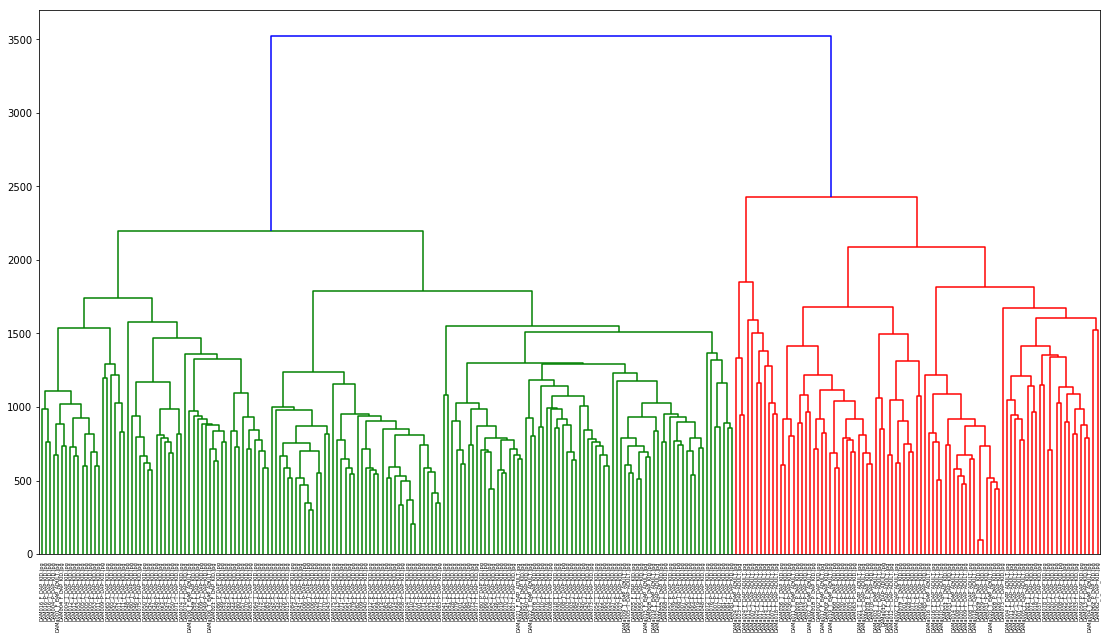

In [ ]:
# Let's use scipy to plot a dendogram to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# Let's use the 'ward' method to compute the distance between clusters which 
# minimize the variance between clusters
linked = linkage(vgg19_feature_list_np, 'ward')

# Use filenames as label list
labelList = filenames

# Plot the dendogram as a descendeing tree
plt.figure(figsize=(19, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [ ]:
# Based on the dendogram, lt's pick 5 clusters
# Let's use sklearn to perform the hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

k = 8
hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
hclustering.fit(vgg19_feature_list_np)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func='deprecated')

In [ ]:
# Print the cluster to which each image was assigned to
print(hclustering.labels_)  

[6 1 4 1 7 4 0 1 4 0 0 7 4 2 3 3 6 4 7 0 1 7 0 7 4 7 3 7 4 4 6 3 7 0 4 0 7
 0 0 1 6 1 1 6 0 7 0 0 4 7 6 7 3 0 1 0 6 7 4 4 7 4 5 4 4 4 0 4 0 1 7 2 7 0
 4 4 1 4 4 0 4 0 4 4 1 4 4 1 4 0 7 1 3 1 0 7 4 4 3 1 4 1 4 4 7 1 2 4 4 6 4
 0 6 7 4 3 4 4 3 0 2 3 7 3 1 6 4 1 4 6 0 0 6 4 6 1 4 1 4 6 1 4 0 4 0 7 4 7
 4 1 0 4 7 0 7 7 6 7 4 3 3 0 1 0 7 7 3 0 1 3 4 7 0 2 4 0 7 1 4 7 7 3 7 2 7
 0 1 4 0 4 3 4 1 4 4 0 0 4 0 4 3 1 0 0 7 4 6 0 0 0 0 0 0 4 0 0 6 5 0 0 3 1
 7 3 4 4 0 5 0 4 4 4 3 1 3 6 2 4 7 0 1 4 1 4 7 1 7 0 6 4 0 3 4 3 2 1 7 7]


In [ ]:
# First, let's create a 2D pandas dataframe 
# this is necessary to plot the images by cluster later

# get filenames as a numpy aray
filenames_np = np.asarray(filenames)

# get cluster labels as a numpr array
clusters_np = hclustering.labels_

# create pandas dataframe stacking numpy arrays by column
drawings_df = pd.DataFrame({'filenames_np':filenames_np, 'clusters_np':clusters_np})

print(type(drawings_df))
print("Shape: ", drawings_df.shape)
print(drawings_df.head())

<class 'pandas.core.frame.DataFrame'>
Shape:  (258, 2)
   clusters_np             filenames_np
0            7     DAM024_P_DAP_KID.jpg
1            4     DAM081_P_DAP_KID.jpg
2            6  DAMa016_T_DAP_ADULT.jpg
3            4     DAM064_P_DAP_KID.jpg
4            3     DAM013_F_DAP_KID.jpg


In [ ]:
# Let's export the pandas dataframe to a csv for later
drawings_df.to_csv("h_clusters_drawings_block5_pool_all.csv", sep=',')

## Plotting drawings by cluster

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [ ]:
clusters_path= "CovNet_Human_Drawings/data/cluster_dataframes/h_clusters_8_drawings_block5_pool_all.csv"
drawings_df = pd.read_csv(clusters_path, sep=",")

In [ ]:
# Let's create 8 dataframes, one for cluster, for plotting
clusters_g = drawings_df.groupby("clusters_np")
print(len(clusters_g)) 

8


In [ ]:
clusters_g.size()

clusters_np
0    56
1    35
2     8
3    24
4    71
5     3
6    19
7    42
dtype: int64

In [ ]:
# TO DO: Change path after uploading "age_clusters_merged.csv"
clusters_age_path= "age_clusters_merged.csv"
clusters_age_df = pd.read_csv(clusters_age_path, sep=",")

In [ ]:
clusters_age_mean = clusters_age_df.groupby('clusters_np', as_index=False)['age_yr'].mean()
print(clusters_age_mean)

   clusters_np     age_yr
0            0   4.148813
1            1   7.847219
2            2  20.676250
3            3   6.701275
4            4   5.332912
5            5  19.650000
6            6  12.998182
7            7   3.658291


In [ ]:
clusters_age_mean.iloc[0][1]

7.847218944155967

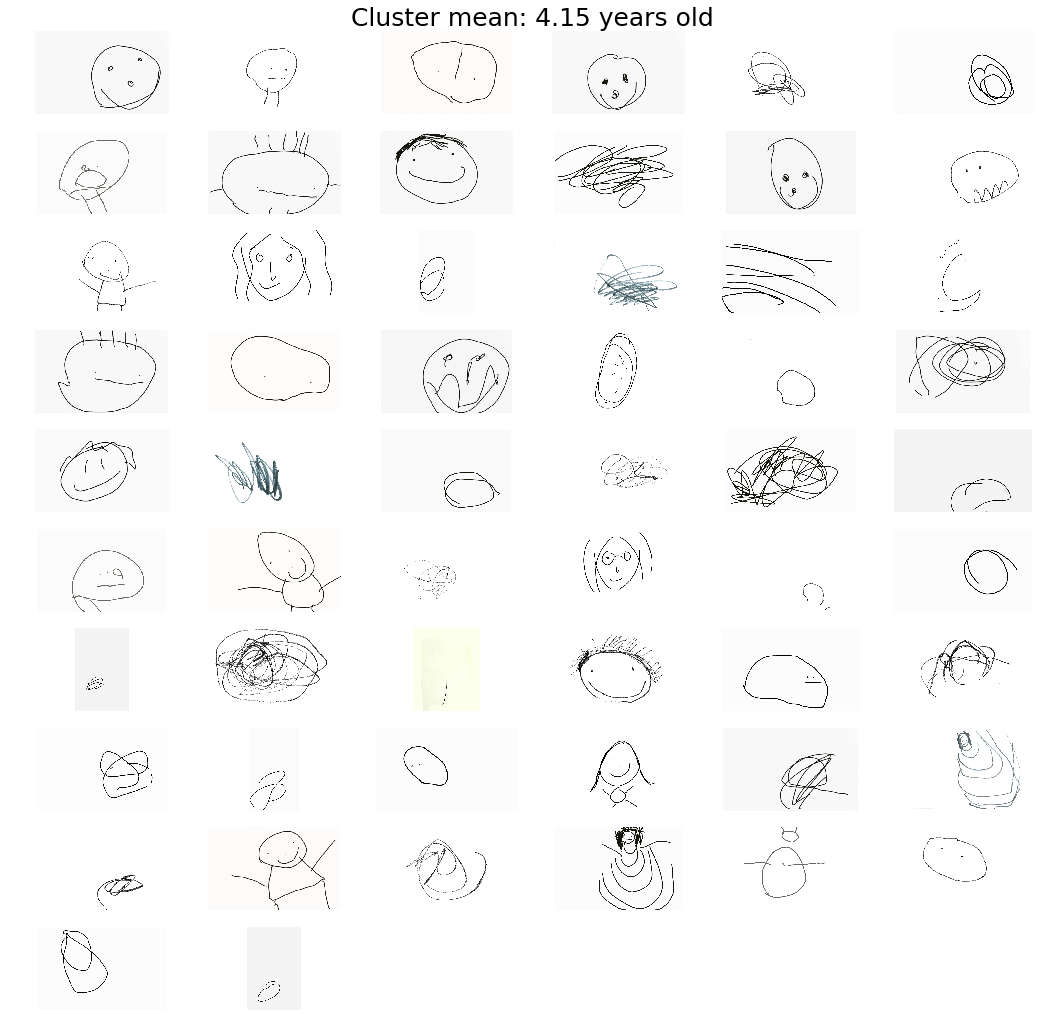

In [ ]:
# Let's plot all images classified together in cluster 0
# Image parameters
# n cluster 0 = 56
width = 10
height = 10
nrows = 10
ncols = 6
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster_n = 0

# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')
plt.savefig('cluster_0_block5_pool_drawings_all.jpg', dpi=200)
plt.show()


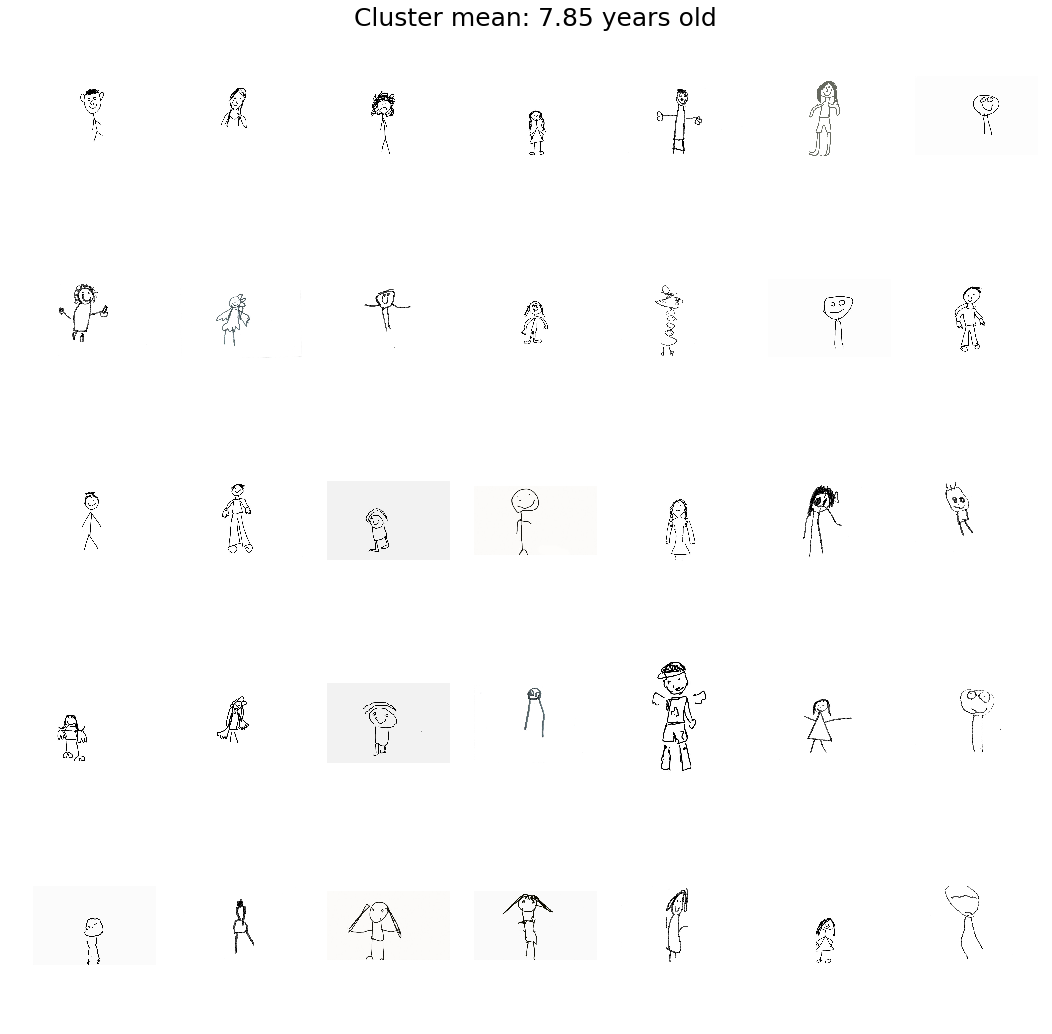

In [ ]:
# Let's plot all images classified together in cluster 1

# Image parameters
# n cluster 1 = 35
width = 10
height = 10
nrows = 5
ncols = 7
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster_n = 1
# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_1_block5_pool_drawings_all.jpg', dpi=200)
plt.show()

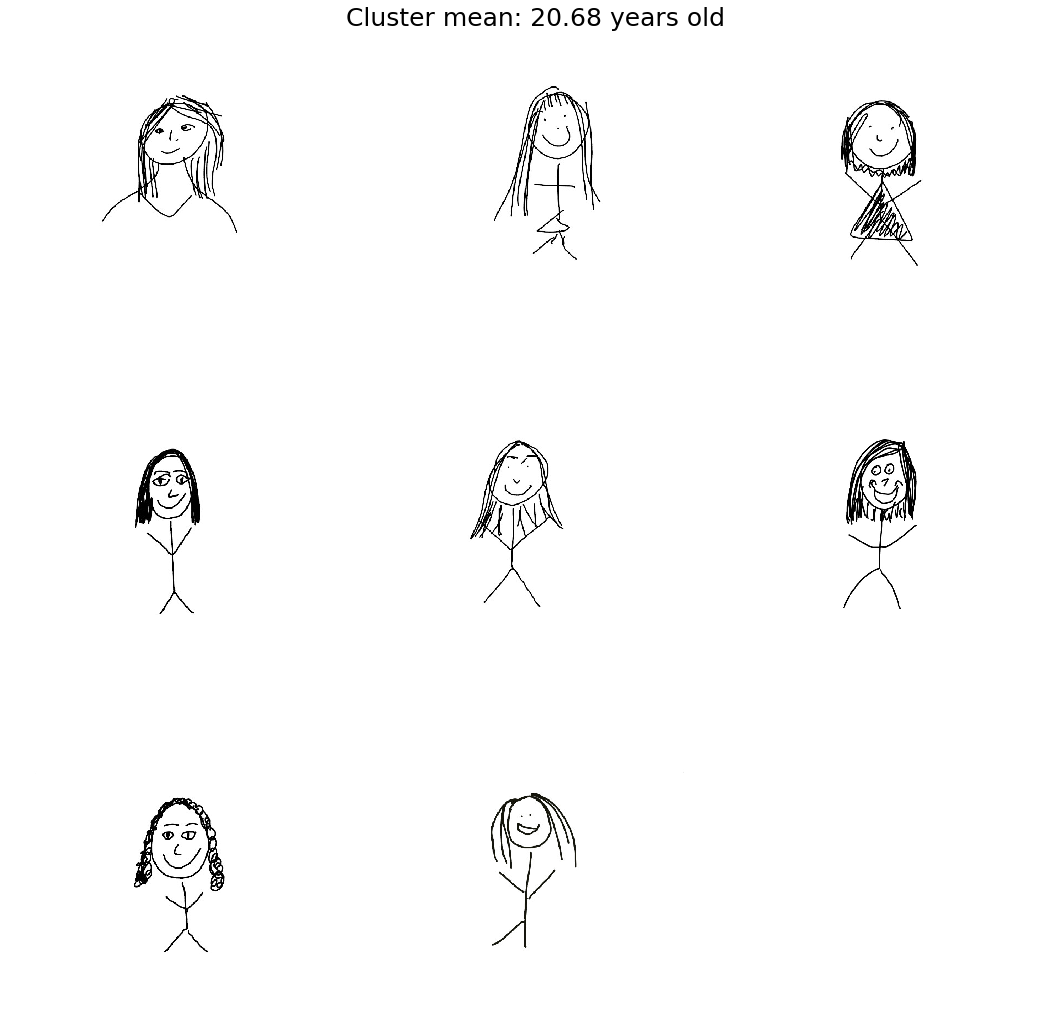

In [ ]:
# Let's plot all images classified together in cluster 2

# Image parameters
# n cluster = 8
width = 10
height = 10
nrows = 3
ncols = 3
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 

cluster_n = 2

# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_2_block5_pool_drawings_all.jpg', dpi=200)
plt.show()

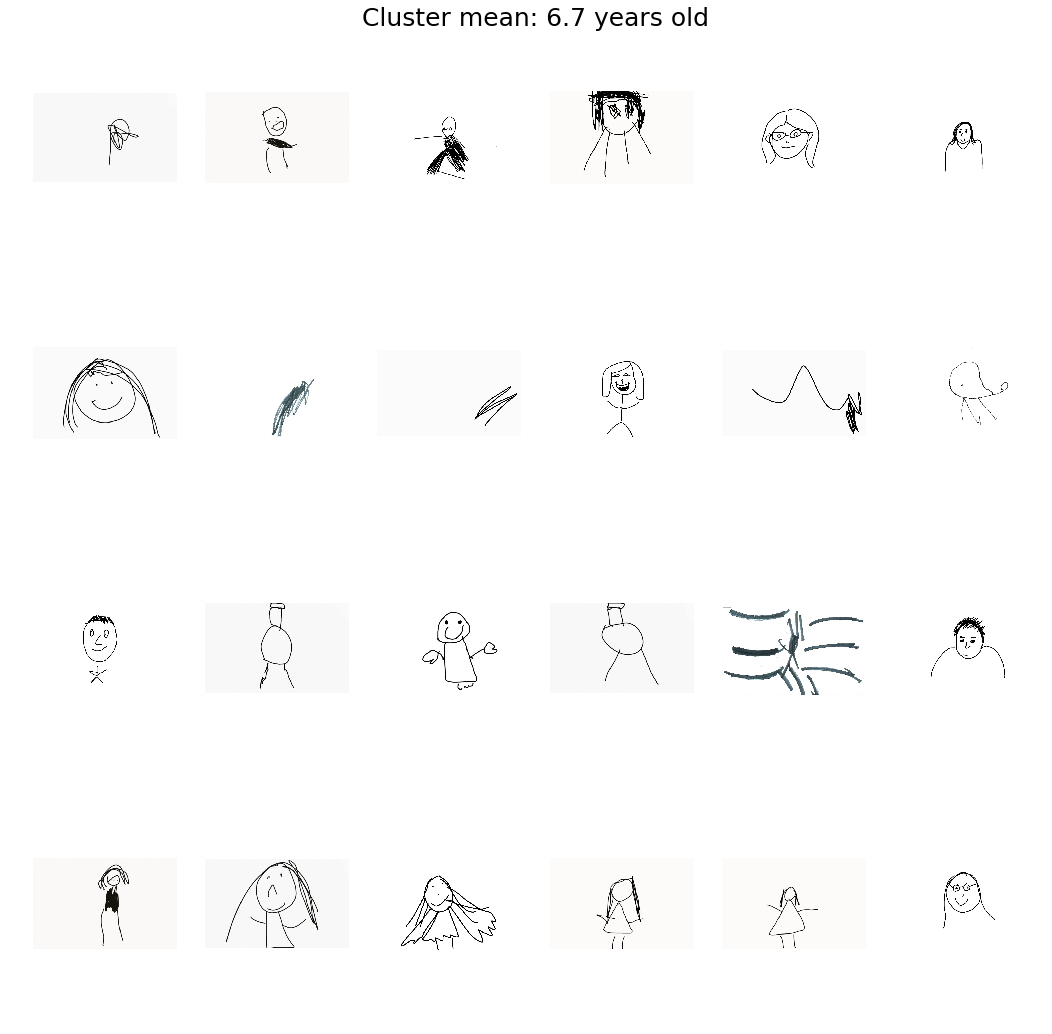

In [ ]:
# Let's plot all images classified together in cluster 3

# Image parameters
# n cluster 3 = 24
width = 10
height = 10
nrows = 4
ncols = 6
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 


cluster_n = 3
# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_3_block5_pool_drawings_all.jpg', dpi=200)
plt.show()

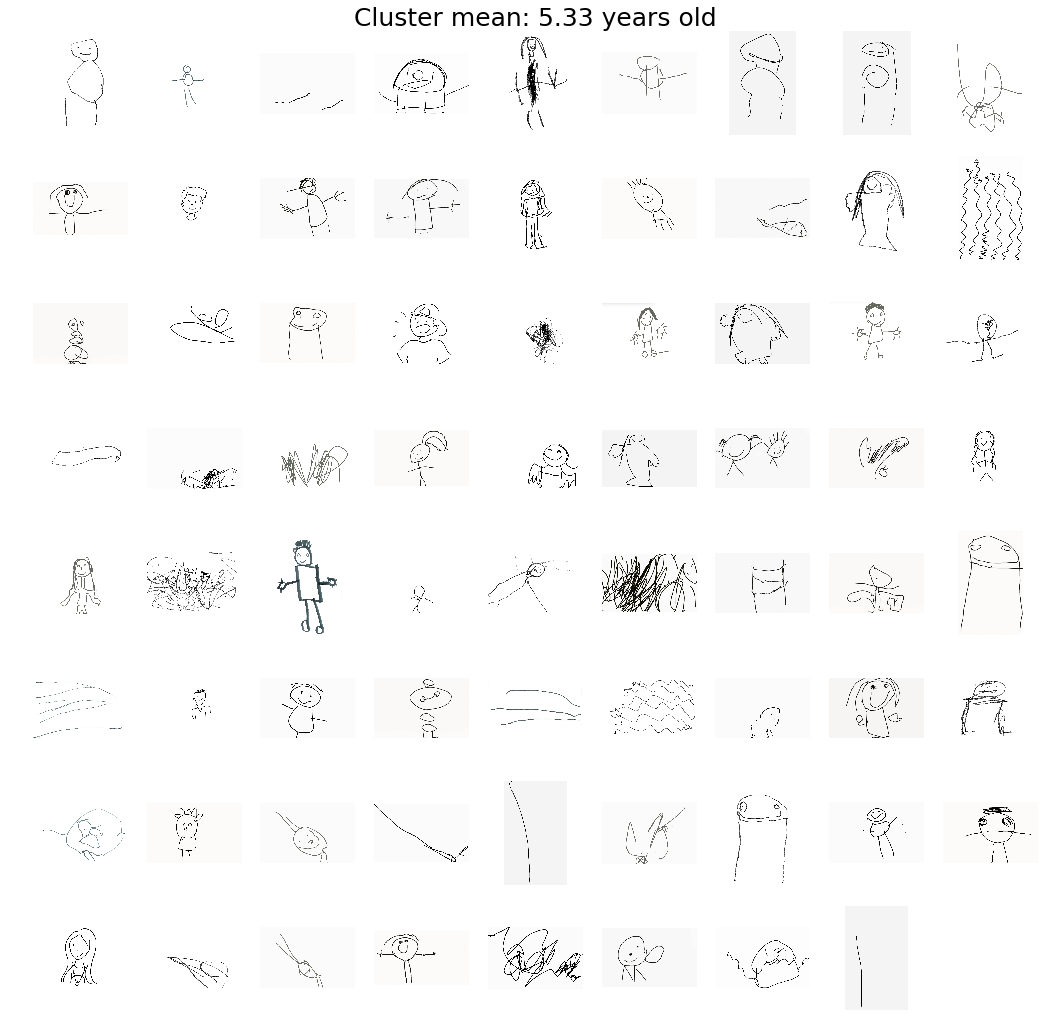

In [ ]:
# Let's plot all images classified together in cluster 4

# Image parameters
# n cluster 4 = 71
width = 10
height = 10
nrows = 8
ncols = 9
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 


cluster_n = 4
# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')


# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_4_block5_pool_drawings_all.jpg', dpi=200)
plt.show()

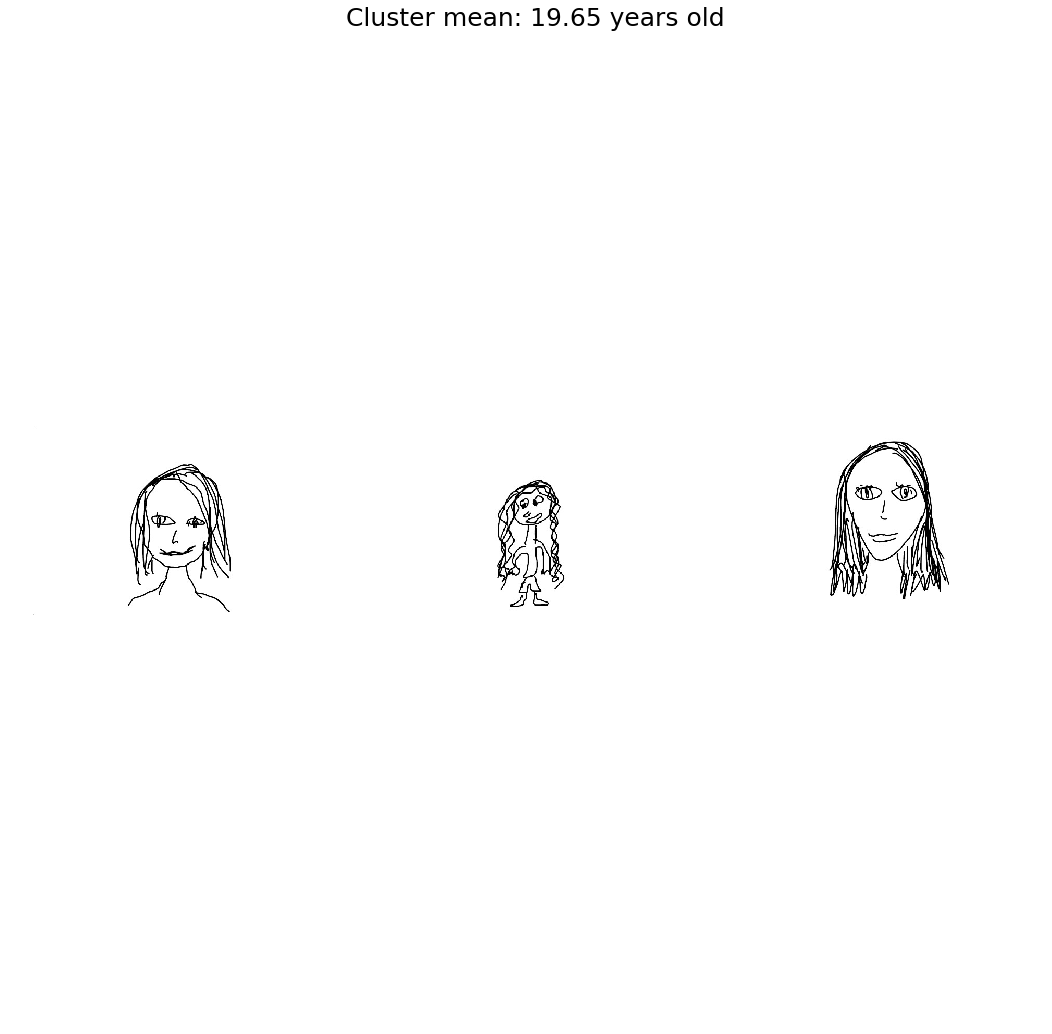

In [ ]:
# Let's plot all images classified together in cluster 5

# Image parameters
# n cluster 4 = 3
width = 10
height = 10
nrows = 1
ncols = 3
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 


cluster_n = 5
# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')

# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_5_block5_pool_drawings_all.jpg', dpi=200)
plt.show()

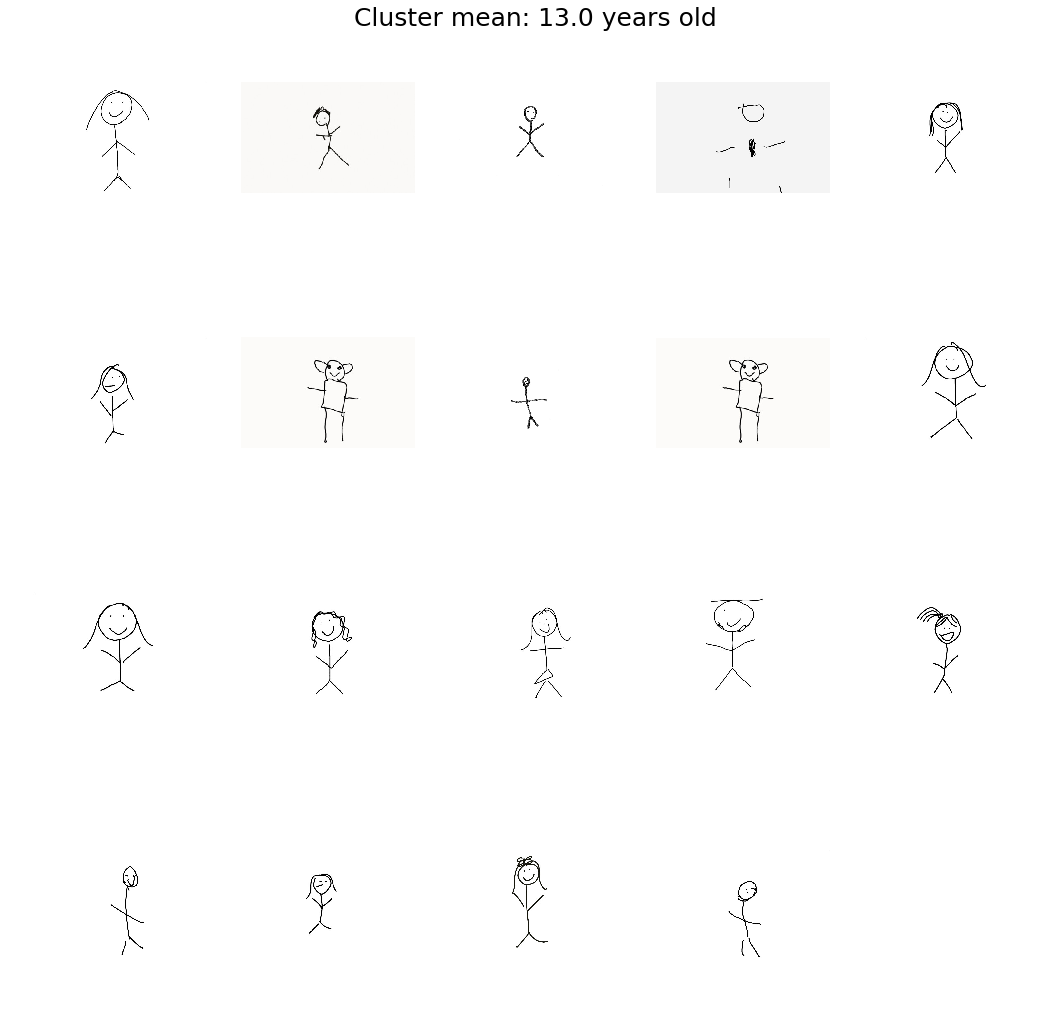

In [ ]:
# Let's plot all images classified together in cluster 6

# Image parameters
# n cluster 4 = 19
width = 10
height = 10
nrows = 4
ncols = 5
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 


cluster_n = 6
# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')


# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_6_block5_pool_drawings_all.jpg', dpi=200)
plt.show()

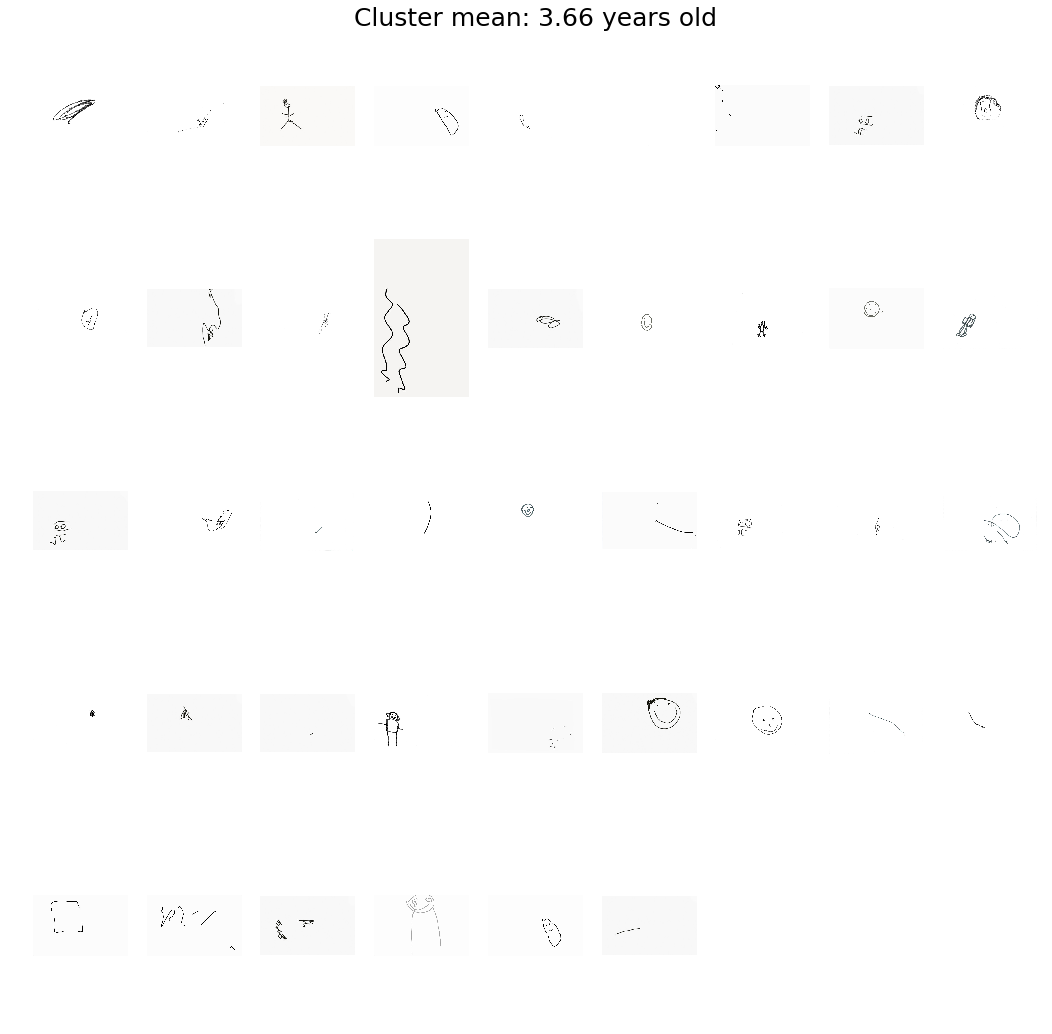

In [ ]:
# Let's plot all images classified together in cluster 7

# Image parameters
# n cluster 4 = 42
width = 10
height = 10
nrows = 5
ncols = 9
fig=plt.figure(figsize=(18, 18)) 

# We need to create a counter to loop over images and allocate 
# the image in the right position in the grid
pic_index = 0 


cluster_n = 7
# cluster to plot
cluster = clusters_g.get_group(cluster_n)

mean = round(clusters_age_mean.iloc[cluster_n][1],2)
plt.title("Cluster mean: {} years old".format(mean), fontsize=25)  
sns.despine(top=True, right=True, left=True, bottom=True)
plt.axis('off')


# Loop over each pic and plot it in the the grid
# .iterrows() is a method that works with pandas dataframes
for index, row in (cluster.iterrows()): 
  pic_index += 1
  # Create grid to plot images
  fig.add_subplot(nrows, ncols, pic_index)
  img_path = path + row['filenames_np']
  img=mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  # get rid off axis and grid within each pic
  plt.axis('off')

plt.savefig('cluster_7_block5_pool_drawings_all.jpg', dpi=200)
plt.show()